# **Import The Dataset**

In [3]:
import pandas as pd
data = pd.read_csv("instagram_reach.csv")
# print(data)
row = data['Time since posted']
def update(x):
  tsp = float (x[0:2])
  return tsp
data['Time since posted'] = data['Time since posted'].apply(update)
data


,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11.0,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2.0,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2.0,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3.0,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3.0,30
...,...,...,...,...,...,...,...,...
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3.0,31
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3.0,42
97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3.0,10
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3.0,222


### **import some other Python libraries and prepare a function to examine the word cloud to understand the maximum type of words used in Instagram captions and hashtags:**

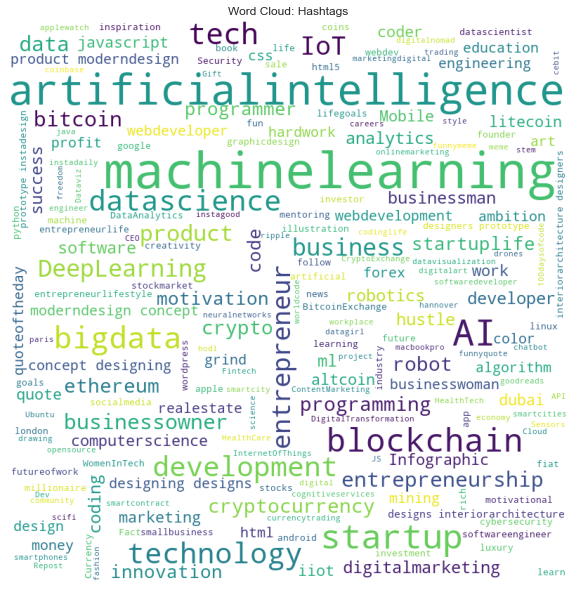

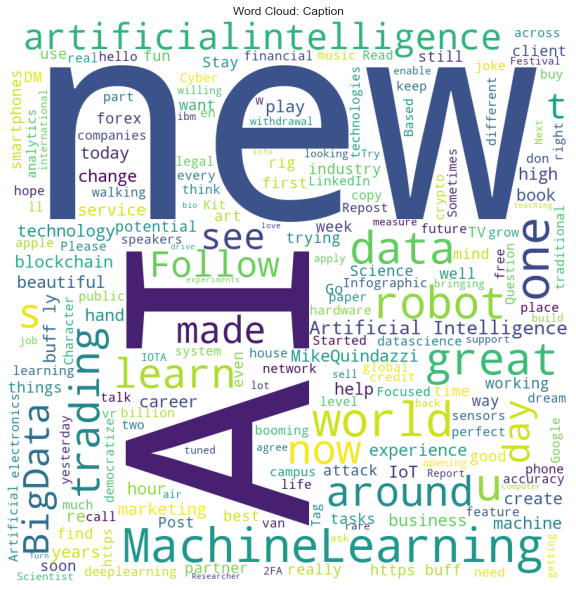

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
stopwords.add('will')
import re
import seaborn as sns
sns.set()
plt.style.use('seaborn-whitegrid')

def WordCloudPlotter(dfColumn):
    colData = data[dfColumn]
    textCloud = ''
    
    #text processing
    # converting colums to a 
    #single line of text
    for mem in colData:
        textCloud = textCloud + str(mem)
    
    # plotting word cloud
    wordcloud = WordCloud(width = 800, height = 800,background_color ='white', 
                          stopwords = stopwords,  min_font_size = 10).generate(textCloud)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.style.use('seaborn-whitegrid')
    plt.imshow(wordcloud) 
    plt.rcParams.update({'font.size': 25})
    plt.axis("off") 
    plt.title('Word Cloud: ' + str(dfColumn))
    plt.tight_layout(pad = 0) 
#     plt.savefig("/content/hashtag.png")
    plt.show()
    
WordCloudPlotter('Hashtags')
WordCloudPlotter('Caption')


### **Now let’s understand the number of likes we get based on the number of followers we have and the time elapsed since our post:**



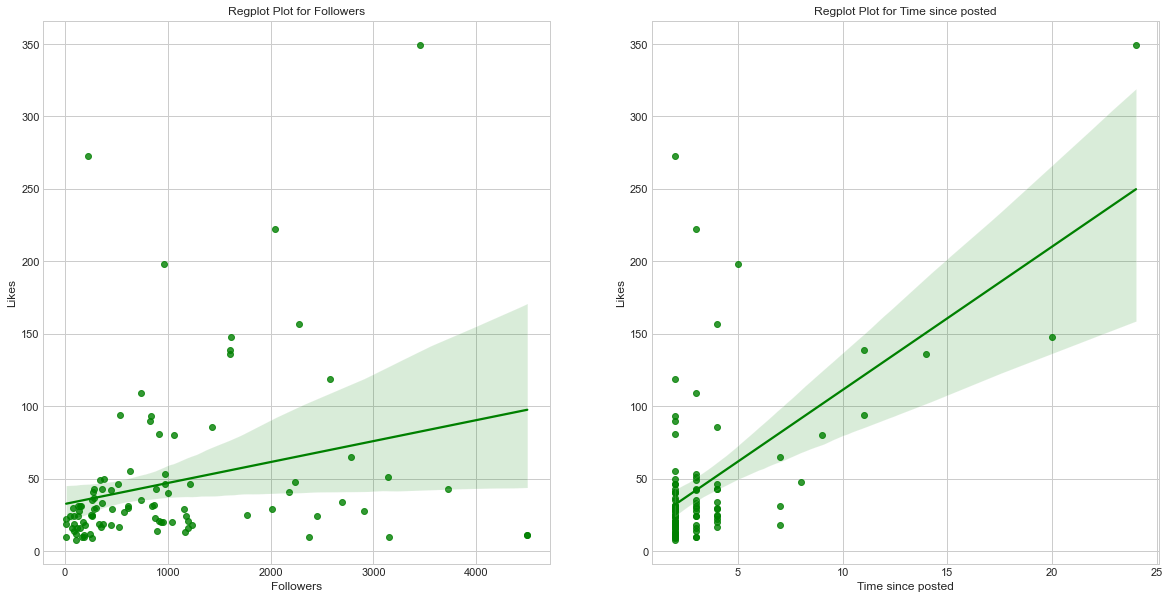

In [5]:
def PlotData(features):
    plt.figure(figsize= (20, 10))    
    pltNum = 1
    for mem in features:
        plt.subplot(1, 2 , pltNum)
        plt.style.use('seaborn-whitegrid')
        plt.grid(True)
        plt.title('Regplot Plot for '+ str(mem))
        sns.regplot(data = data, x = mem, y = 'Likes', color = 'green')
        pltNum += 1
    
    plt.show()
#     plt.savefig("/content/Time_since_posted_regplot.png")
  
PlotData(['Followers','Time since posted'])

### **Now I’m going to train a simple model to predict the target value which is “likes” with the combination of followers and time since post:**

In [23]:
import numpy as np
features = np.array(data[['Followers','Time since posted']])
targets = np.array(data['Likes'], dtype = 'float32')
maxValLikes = max(targets)
print('Max value of target is {}'.format(maxValLikes))

Max value of target is 349.0


# **Training Model:**
### Now let’s train the Instagram algorithm with Python:

## Using Gradient Boosting Regressor

Training Score:  96.84 %
Testing Score:  79.1 %
Accuracy Score of Model:  79.1 %


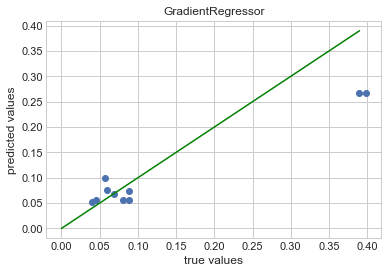

In [24]:
targets = targets/maxValLikes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

xTrain, xTest, yTrain, yTest = train_test_split(features, targets, test_size = 0.1, random_state = 42)

stdSc = StandardScaler()
xTrain = stdSc.fit_transform(xTrain)
xTest = stdSc.transform(xTest)

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(xTrain, yTrain)

predictions = gbr.predict(xTest)

#Printing Training and testing Score
print('Training Score: ', round(gbr.score(xTrain,yTrain)*100,2),'%')
print('Testing Score: ', round(gbr.score(xTest,yTest)*100,2),'%')

#Getting accuracy of the model
acc=metrics.r2_score(yTest,predictions)
print("Accuracy Score of Model: ",round(acc*100,2),'%')

plt.scatter(yTest, predictions)
plt.style.use('seaborn-whitegrid')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('GradientRegressor')
plt.plot(np.arange(0,0.4, 0.01), np.arange(0, 0.4, 0.01), color = 'green')
plt.grid(True)

## Using Linear Regression


Training Score:  35.36 %
Testing Score:  79.07 %
Accuracy Score of Model:  79.07 %


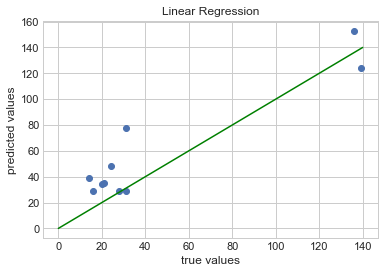

In [37]:
from sklearn.linear_model import LinearRegression
df = data

#Preprocessing and data cleaning
df = df.drop(['S.No','USERNAME','Caption','Hashtags'],axis=1)
df['Time']=df['Time since posted']
df.drop(['Time since posted'],axis=1)
df = df[['Followers','Time','Likes']]
df1 = df.values
X, y = df1[:,:-1], df1[:,-1]

#Splitting dataset into 10% test and 90% train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

#Scaling Features
scaled_features = StandardScaler().fit_transform(X_train, X_test)

#Training dataset using Linear Regression
lgr=LinearRegression()
lgr.fit(X_train,y_train)
y_predict = lgr.predict(X_test)

#Printing Training and testing Score
print('Training Score: ', round(lgr.score(X_train,y_train)*100,2),'%')
print('Testing Score: ', round(lgr.score(X_test,y_test)*100,2),'%')

#Getting accuracy of the model
acc=metrics.r2_score(y_test,y_predict)
print("Accuracy Score of Model: ",round(acc*100,2),'%')

#Plotting the regression line
plt.scatter(y_test, y_predict)
plt.style.use('seaborn-whitegrid')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('Linear Regression')
plt.plot(np.arange(0,160, 20), np.arange(0, 160, 20), color = 'green')
plt.grid(True)

# **Prediction**

## Prediction for **100** followers

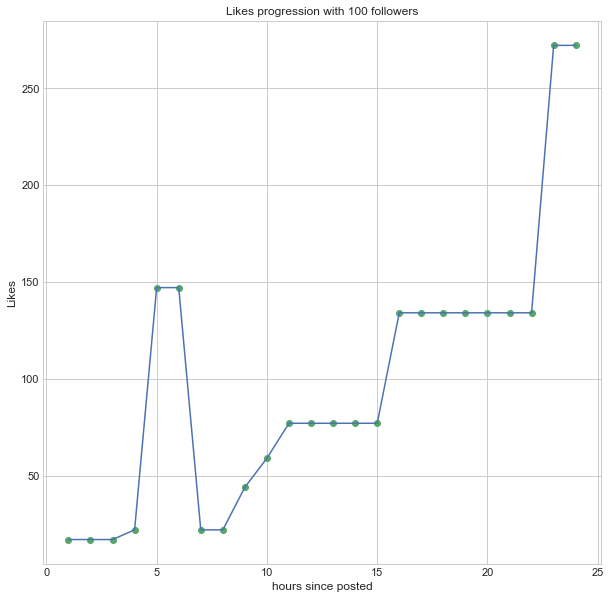

In [9]:
def PredictionsWithConstantFollowers(model, followerCount, scaller, maxVal):
    followers = followerCount * np.ones(24)
    hours = np.arange(1, 25)
    
    # defining vector 
    featureVector = np.zeros((24, 2))
    featureVector[:, 0] = followers
    featureVector [:, 1] = hours
    
    # doing scalling
    featureVector = scaller.transform(featureVector)
    predictions = model.predict(featureVector)
    predictions = (maxValLikes * predictions).astype('int')
    
    plt.figure(figsize= (10, 10))
    plt.plot(hours, predictions)
    plt.style.use('seaborn-whitegrid')
    plt.scatter(hours, predictions, color = 'g')
    plt.grid(True)
    plt.xlabel('hours since posted')
    plt.ylabel('Likes')
    plt.title('Likes progression with ' + str(followerCount) +' followers')
#     plt.savefig("/content/prediction_100.png")
    plt.show()
    
PredictionsWithConstantFollowers(gbr, 100, stdSc, maxValLikes)

## Prediction for **200** followers

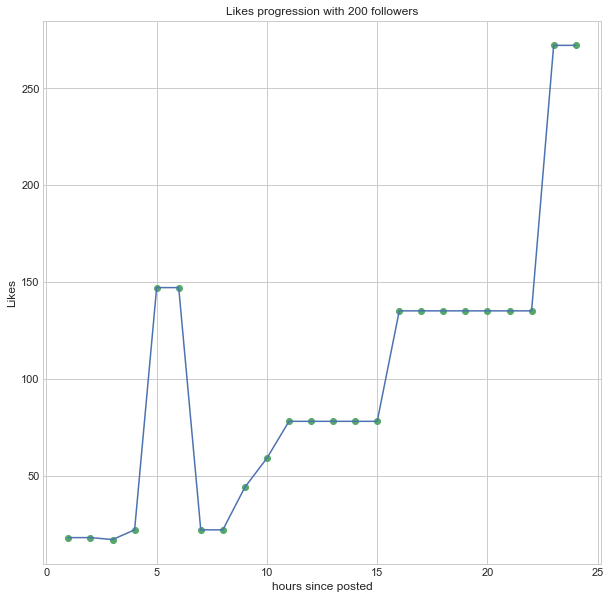

In [10]:
def PredictionsWithConstantFollowers(model, followerCount, scaller, maxVal):
    followers = followerCount * np.ones(24)
    hours = np.arange(1, 25)
    
    # defining vector 
    featureVector = np.zeros((24, 2))
    featureVector[:, 0] = followers
    featureVector [:, 1] = hours
    
    # doing scalling
    featureVector = scaller.transform(featureVector)
    predictions = model.predict(featureVector)
    predictions = (maxValLikes * predictions).astype('int')
    
    plt.figure(figsize= (10, 10))
    plt.plot(hours, predictions)
    plt.style.use('seaborn-whitegrid')
    plt.scatter(hours, predictions, color = 'g')
    plt.grid(True)
    plt.xlabel('hours since posted')
    plt.ylabel('Likes')
    plt.title('Likes progression with ' + str(followerCount) +' followers')
    plt.show()
#     plt.savefig("/content/prediction_200.png")
    
PredictionsWithConstantFollowers(gbr, 200, stdSc, maxValLikes)

## Prediction for **500** followers

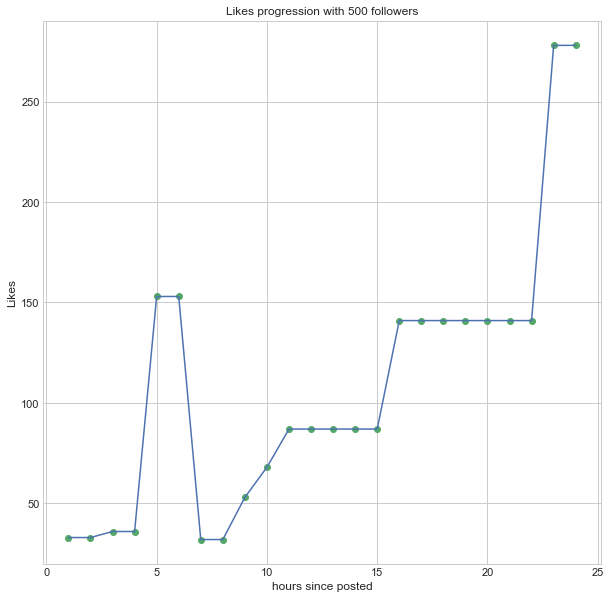

In [11]:
def PredictionsWithConstantFollowers(model, followerCount, scaller, maxVal):
    followers = followerCount * np.ones(24)
    hours = np.arange(1, 25)
    
    # defining vector 
    featureVector = np.zeros((24, 2))
    featureVector[:, 0] = followers
    featureVector [:, 1] = hours
    
    # doing scalling
    featureVector = scaller.transform(featureVector)
    predictions = model.predict(featureVector)
    predictions = (maxValLikes * predictions).astype('int')
    
    plt.figure(figsize= (10, 10))
    plt.plot(hours, predictions)
    plt.style.use('seaborn-whitegrid')
    plt.scatter(hours, predictions, color = 'g')
    plt.grid(True)
    plt.xlabel('hours since posted')
    plt.ylabel('Likes')
    plt.title('Likes progression with ' + str(followerCount) +' followers')
    plt.show()
#     plt.savefig("/content/prediction_500.png")
    
PredictionsWithConstantFollowers(gbr, 500, stdSc, maxValLikes)

## Prediction for **1000** followers

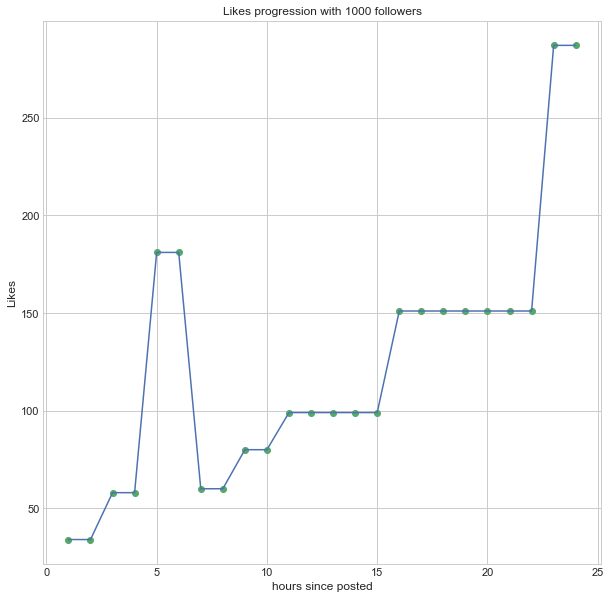

In [12]:
def PredictionsWithConstantFollowers(model, followerCount, scaller, maxVal):
    followers = followerCount * np.ones(24)
    hours = np.arange(1, 25)
    
    # defining vector 
    featureVector = np.zeros((24, 2))
    featureVector[:, 0] = followers
    featureVector [:, 1] = hours
    
    # doing scalling
    featureVector = scaller.transform(featureVector)
    predictions = model.predict(featureVector)
    predictions = (maxValLikes * predictions).astype('int')
    
    plt.figure(figsize= (10, 10))
    plt.plot(hours, predictions)
    plt.style.use('seaborn-whitegrid')
    plt.scatter(hours, predictions, color = 'g')
    plt.grid(True)
    plt.xlabel('hours since posted')
    plt.ylabel('Likes')
    plt.title('Likes progression with ' + str(followerCount) +' followers')
    plt.show()
#     plt.savefig("/content/prediction_1000.png")
    
PredictionsWithConstantFollowers(gbr, 1000, stdSc, maxValLikes)

# **Conclusion**
### Based on the predictions above, we can observe one thing: if you have a higher number of followers, your post is more likely to get more likes in attendance for life. But the maximum likes will not increase more than 20 times the number of followers only contributes to an increase of about 20% in likes.